 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [55]:
# Reading whale returns
whale_returns_cvs= Path("Resources/whale_returns.csv")
whale_returns_df= pd.read_csv(whale_returns_cvs)
whale_returns_df["Date"]= pd.to_datetime(whale_returns_df["Date"], dayfirst= True)
whale_returns_df.set_index(whale_returns_df["Date"], inplace= True)
whale_returns_df.drop(columns=["Date"], inplace= True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [56]:
# Count nulls
whale_returns_df.isnull().mean()
whale_returns_df.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls
whale_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [58]:
# Reading algorithmic returns
algo_returns_cvs= Path("Resources/algo_returns.csv")
algo_returns_df= pd.read_csv(algo_returns_cvs)
algo_returns_df["Date"]= pd.to_datetime(algo_returns_df["Date"], dayfirst= True)
algo_returns_df.set_index(algo_returns_df["Date"], inplace= True)
algo_returns_df.drop(columns=["Date"], inplace= True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [59]:
# Count nulls
algo_returns_df.isnull().mean()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [60]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [67]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_cvs= Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df= pd.read_csv(sp_tsx_history_cvs)
sp_tsx_history_df["Date"]= pd.to_datetime(sp_tsx_history_df["Date"], dayfirst= True)
sp_tsx_history_df.set_index(sp_tsx_history_df["Date"], inplace= True)
sp_tsx_history_df.drop(columns=["Date"], inplace= True)
sp_tsx_history_df ["Close"]= sp_tsx_history_df["Close"].str.replace("$","")
sp_tsx_history_df ["Close"]
sp_tsx_history_df= sp_tsx_history_df.sort_values("Date", ascending= True)
sp_tsx_history_df.head()

<ipython-input-67-cc0fa1792eed>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_df ["Close"]= sp_tsx_history_df["Close"].str.replace("$","")


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [62]:
# Check Data Types

sp_tsx_history_df.dtypes


Close    object
dtype: object

In [68]:
# Fix Data Types
sp_tsx_history_df["Close"]= sp_tsx_history_df["Close"].replace({",":""},regex= True)

sp_tsx_history_df.dtypes



Close    object
dtype: object

In [73]:
# Calculate Daily Returns

print(sp_tsx_history_df.isnull().sum())

sp_tsx_returns_df=sp_tsx_history_df.pct_change()


sp_tsx_returns_df.head()



Close    0
dtype: int64


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [79]:
# Drop nulls

sp_tsx_returns_df= sp_tsx_returns_df.dropna()

In [80]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_returns_df= sp_tsx_returns_df.rename(columns={'Close':'S&P TSX 60'})
sp_tsx_returns_df.head()


,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [85]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_portfolios_df=pd.concat([whale_returns_df,algo_returns_df,sp_tsx_returns_df], axis='columns',join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

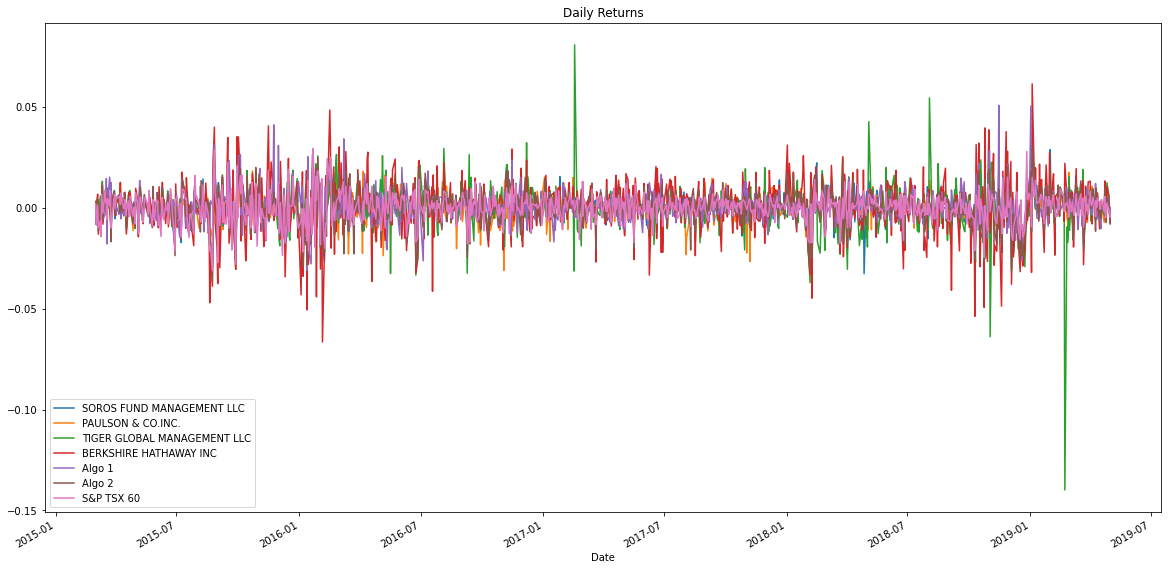

In [87]:
# Plot daily returns of all portfolios

combined_portfolios_df.plot(title='Daily Returns',figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

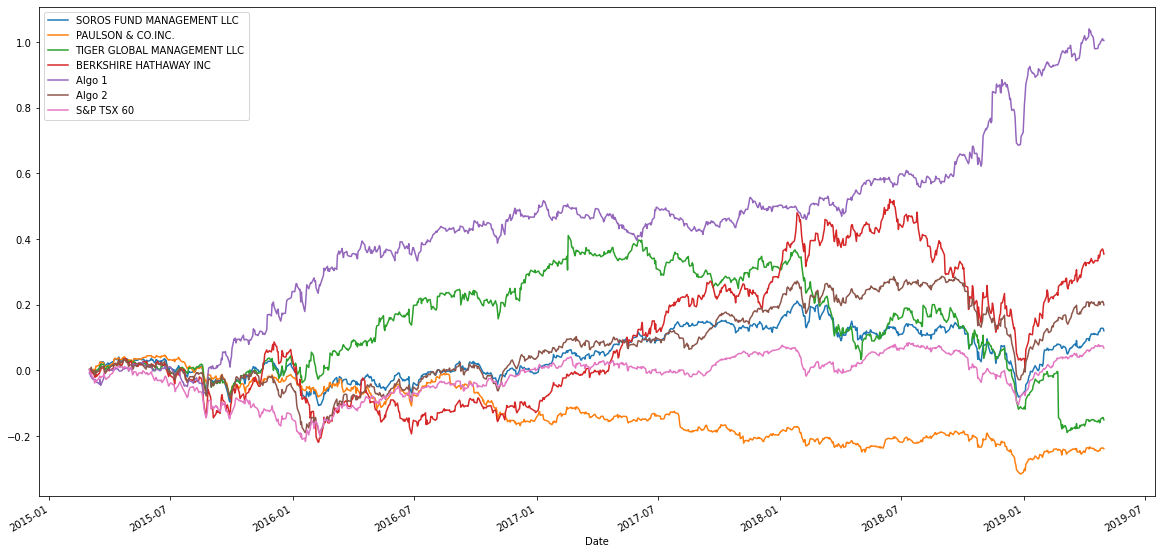

In [90]:
# Calculate cumulative returns of all portfolios

combined_portfolios_df_cumulative_returns=((1+combined_portfolios_df).cumprod())-1
combined_portfolios_df_cumulative_returns.head()
# Plot cumulative returns
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

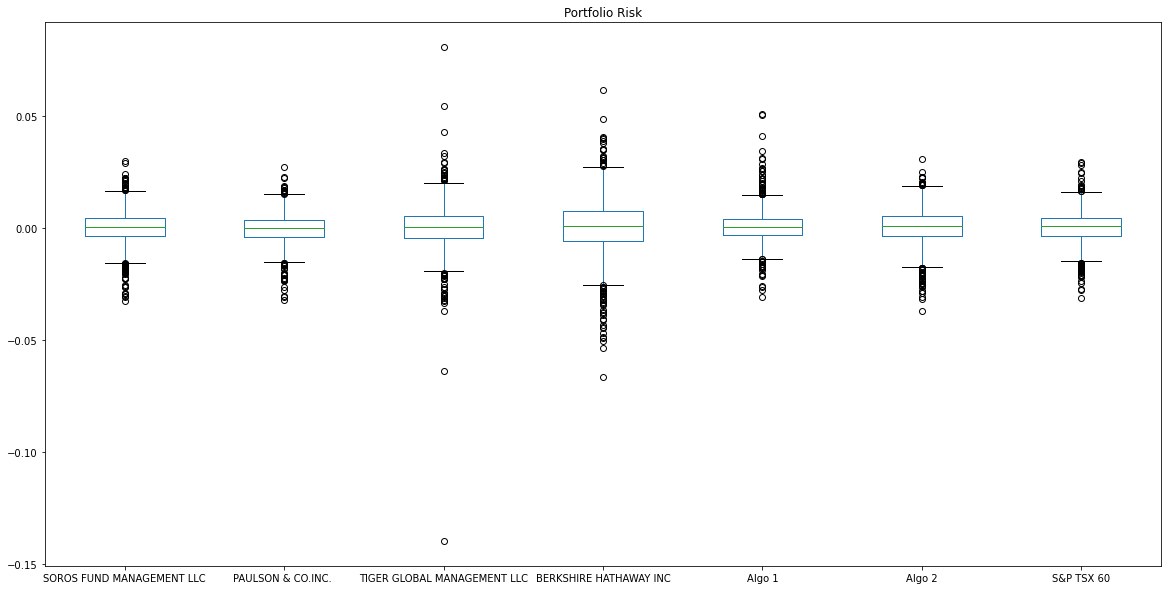

In [101]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title='Portfolio Risk',figsize=(20,10))

### Calculate Standard Deviations

In [94]:
# Calculate the daily standard deviations of all portfolios

daily_std=combined_portfolios_df.std().sort_values(ascending=False)

### Determine which portfolios are riskier than the S&P TSX 60

In [99]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_daily_std= sp_tsx_returns_df.std()

# Determine which portfolios are riskier than the S&P TSX 60

risk_port=(daily_std>sp_daily_std['S&P TSX 60'])
risk_port.head()


BERKSHIRE HATHAWAY INC         True
TIGER GLOBAL MANAGEMENT LLC    True
Algo 2                         True
SOROS FUND MANAGEMENT LLC      True
Algo 1                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized standard deviation (252 trading days)

annual_standard_d= daily_std*np.sqrt(252)
annual_standard_d.sort_values(ascending=False)
annual_standard_d.head()



BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120491
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [109]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_portfolios_df.rolling(window=21).std()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'21 Days Stan Dev'}, xlabel='Date'>

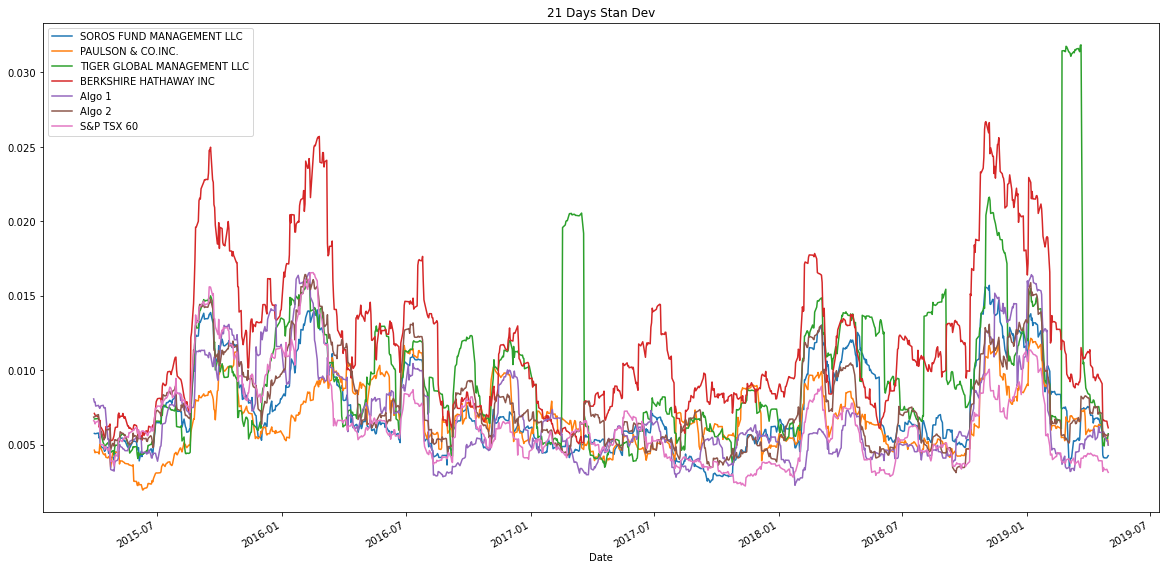

In [115]:
# Plot the rolling standard deviation

combined_portfolios_df.rolling(window=21).std().plot(title='21 Days Stan Dev', figsize=(20,10))


Calculate and plot the correlation

In [116]:
# Calculate the correlation

cor= combined_portfolios_df.corr()
cor



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


<AxesSubplot:>

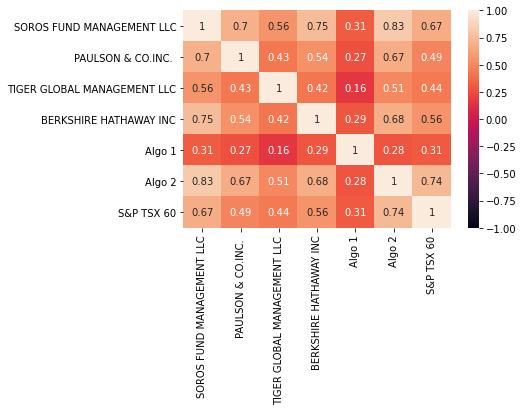

In [119]:
# Display de correlation matrix

sns.heatmap(cor, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [120]:
# Calculate covariance of a single portfolio

tiger_global_covariance = combined_portfolios_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_portfolios_df['S&P TSX 60'])
tiger_global_covariance



Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000012
2019-04-26    0.000012
2019-04-29    0.000011
2019-04-30    0.000011
2019-05-01    0.000011
Length: 1030, dtype: float64

In [121]:
# Calculate variance of S&P TSX

vari= combined_portfolios_df['S&P TSX 60'].rolling(window=60).var()
vari

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1030, dtype: float64

In [125]:
# Computing beta

tiger_global_beta= tiger_global_covariance/ vari
tiger_global_beta

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.798315
2019-04-26    0.814015
2019-04-29    0.739528
2019-04-30    0.737933
2019-05-01    0.742140
Length: 1030, dtype: float64

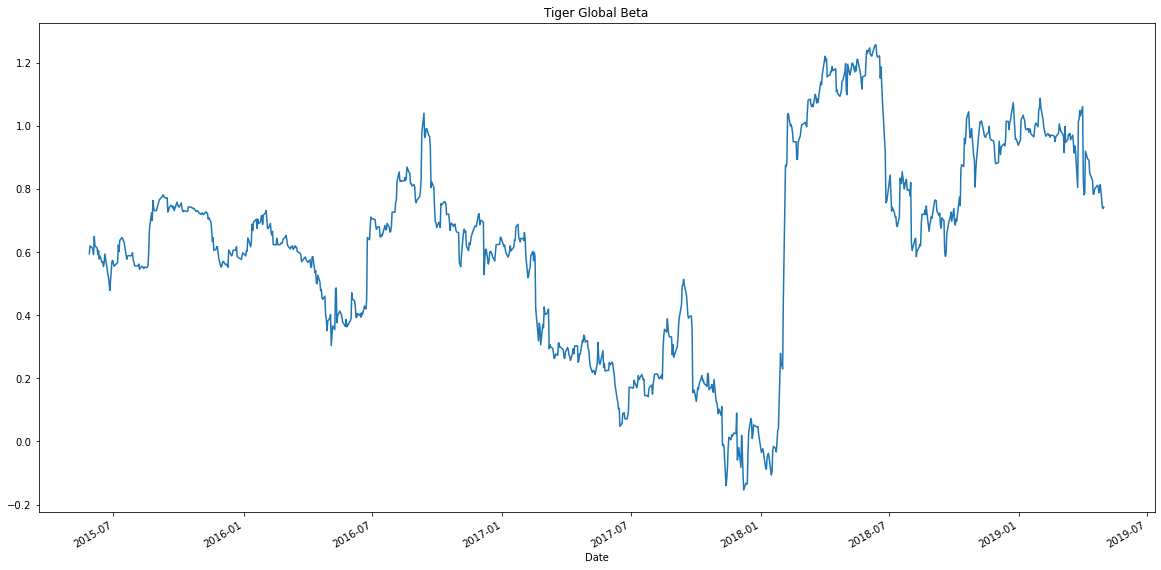

In [127]:
# Plot beta trend

tiger_global_beta_plot= tiger_global_beta.plot(title='Tiger Global Beta', figsize=(20,10))

In [130]:
# Calculate cumulative returms of all portfolios

combined_portfolios_df_cumu_ret=((1-combined_portfolios_df).cumprod())-1
combined_portfolios_df_cumu_ret.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.008158,-0.003200,-0.001950
2015-03-03,0.001266,0.004981,0.000496,0.006569,0.010116,-0.002254,0.006563
2015-03-04,-0.000967,0.001723,0.003031,0.002328,0.018791,-0.004664,0.009956
2015-03-05,-0.004979,-0.002360,0.000669,-0.004414,0.019764,-0.008967,0.008598
2015-03-06,0.002887,0.001206,0.009156,0.008626,0.024819,0.002390,0.018656


<AxesSubplot:xlabel='Date'>

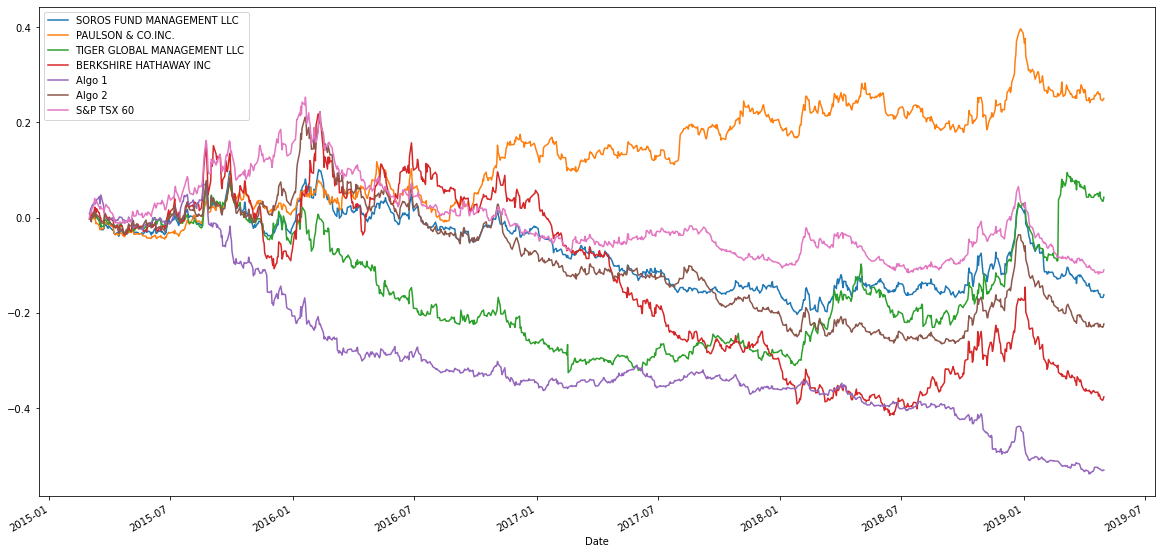

In [131]:
# Plot cumulative returns
combined_portfolios_df_cumu_ret.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [133]:
# Use `ewm` to calculate the rolling window

roll_win_ewmavg=combined_portfolios_df.ewm(halflife=21, adjust= True).std()
roll_win_ewmavg.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,0.004395,0.002934,0.007411
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003724,0.002197,0.005197
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004036,0.002271,0.004843
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003466,0.006589,0.005495


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [137]:
# Annualized Sharpe Ratios

ann_sharpe_ratios= (combined_portfolios_df.mean() * 252)/(combined_portfolios_df.std()* np.sqrt(252))
ann_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
S&P TSX 60                     0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

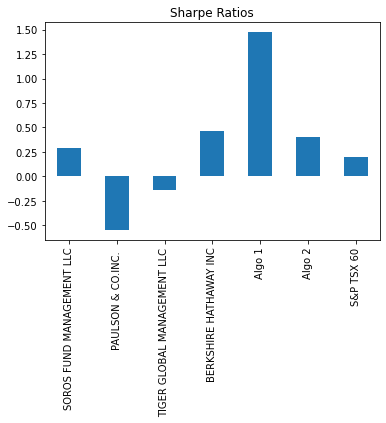

In [138]:
# Visualize the sharpe ratios as a bar plot

sharpe_rat= (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_rat.plot(kind= 'bar', title= 'Sharpe Ratios')

Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

By calculating the sharpe ratios of each stock shows the risk adjusted returns for the past performance of all portfolios. Based on the data presented algorithmic strategies outperformed S&P TSX 60. In comparison to the remainder of the market only Algo1 beat the competitor with a sharpe ratio of 1.50 and Algo2 shortly falls behind Berkshire Hathaway Inc. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [147]:
# Reading data from 1st stock


NKE_csv = Path('Resources/NKE.csv')
NKE_df = pd.read_csv(NKE_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
NKE_df.head()

,Close
Date,
2015-01-02,47.52
2015-01-05,46.75
2015-01-06,46.48
2015-01-07,47.44
2015-01-08,48.53


In [148]:
# Reading data from 2nd stock

AMZN_csv = Path('Resources/AMZN.csv')
AMZN_df = pd.read_csv(AMZN_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
AMZN_df.head()


,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [150]:
# Reading data from 3rd stock

AAPL_csv = Path('Resources/AAPL.csv')
AAPL_df = pd.read_csv(AAPL_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
AAPL_df.head()

,Close
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [152]:
# Combine all stocks in a single DataFrame

comb_stock_port_df=pd.concat([NKE_df,AMZN_df,AAPL_df], axis='columns',join='inner')
comb_stock_port_df.head()


,Close,Close,Close
Date,,,
2015-01-02,47.52,308.52,27.33
2015-01-05,46.75,302.19,26.56
2015-01-06,46.48,295.29,26.57
2015-01-07,47.44,298.42,26.94
2015-01-08,48.53,300.46,27.97


In [158]:
# Reset Date index

comb_stock_port_df.sort_index(inplace=True)
comb_stock_port_df


,Close,Close,Close
Date,,,
2015-01-02,47.52,308.52,27.33
2015-01-05,46.75,302.19,26.56
2015-01-06,46.48,295.29,26.57
2015-01-07,47.44,298.42,26.94
2015-01-08,48.53,300.46,27.97
...,...,...,...
2015-12-23,64.36,663.70,27.15
2015-12-24,63.18,662.79,27.01
2015-12-28,63.81,675.20,26.71


In [159]:
# Reorganize portfolio data by having a column per symbol

comb_stock_port_df.columns=["NKE","AMZN","AAPL"]
comb_stock_port_df

,NKE,AMZN,AAPL
Date,,,
2015-01-02,47.52,308.52,27.33
2015-01-05,46.75,302.19,26.56
2015-01-06,46.48,295.29,26.57
2015-01-07,47.44,298.42,26.94
2015-01-08,48.53,300.46,27.97
...,...,...,...
2015-12-23,64.36,663.70,27.15
2015-12-24,63.18,662.79,27.01
2015-12-28,63.81,675.20,26.71


In [161]:
# Calculate daily returns

comb_stock_port_df.isnull().sum()
comb_stock_port_returns_df=comb_stock_port_df.pct_change()

# Drop NAs

comb_stock_port_returns_df.dropna(inplace= True)

# Display sample data
comb_stock_port_returns_df.columns=["NKE","AMZN","AAPL"]
comb_stock_port_returns_df.head()

,NKE,AMZN,AAPL
Date,,,
2015-01-05,-0.016204,-0.020517,-0.028174
2015-01-06,-0.005775,-0.022833,0.000377
2015-01-07,0.020654,0.010600,0.013925
2015-01-08,0.022976,0.006836,0.038233
2015-01-09,-0.010921,-0.011749,0.001073


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [175]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
weighted_port_returns=comb_stock_port_returns_df.dot(weights)
# Display sample data
weighted_port_returns

Date
2015-01-05   -0.021632
2015-01-06   -0.009411
2015-01-07    0.015060
2015-01-08    0.022682
2015-01-09   -0.007199
                ...   
2015-12-23   -0.003434
2015-12-24   -0.008287
2015-12-28    0.005863
2015-12-29    0.017607
2015-12-30   -0.012006
Length: 250, dtype: float64

In [176]:
# Calculate portfolio return
weighted_port_returns = weighted_port_returns.rename('Lifestyle')
# Display sample data
weighted_port_returns

Date
2015-01-05   -0.021632
2015-01-06   -0.009411
2015-01-07    0.015060
2015-01-08    0.022682
2015-01-09   -0.007199
                ...   
2015-12-23   -0.003434
2015-12-24   -0.008287
2015-12-28    0.005863
2015-12-29    0.017607
2015-12-30   -0.012006
Name: Lifestyle, Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [182]:
# Join your returns DataFrame to the original returns DataFrame

comb_stock_port_2_df=pd.concat([whale_returns_df,sp_tsx_returns_df,algo_returns_df,weighted_port_returns],axis='columns',join='inner')
comb_stock_port_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2,Lifestyle
Date,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.001950,-0.008158,0.003200,0.012008
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949,-0.002817
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416,-0.005264
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323,0.002063
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460,-0.011339


<AxesSubplot:title={'center':'Lifestyle Returns'}, xlabel='Date'>

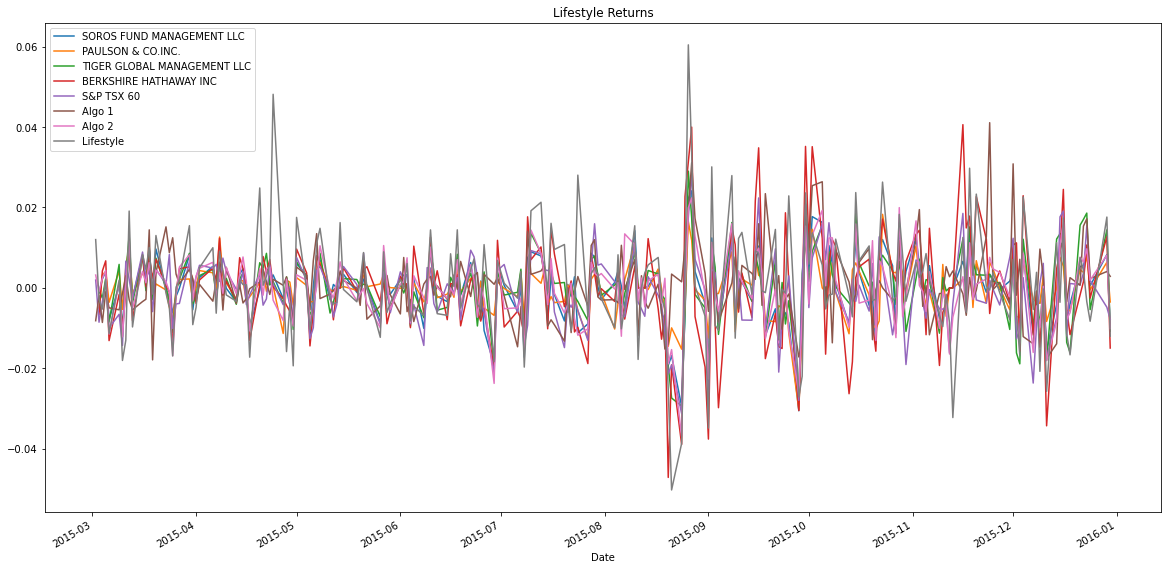

In [183]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


comb_stock_port_2_df.plot(title= "Lifestyle Returns", figsize=(20,10))


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [184]:
# Calculate the annualized `std`

comb_stock_port_2_df_ann=comb_stock_port_2_df*np.sqrt(252)
comb_stock_port_2_df_ann


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2,Lifestyle
Date,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.030958,-0.129501,0.050799,0.190621
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.135407,-0.030830,-0.015073,-0.044720
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.053506,-0.136343,0.038356,-0.083570
2015-03-05,0.063752,0.064705,0.037379,0.106777,0.021334,-0.015161,0.068628,0.032751
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.158302,-0.078686,-0.181927,-0.179995
...,...,...,...,...,...,...,...,...
2015-12-22,0.087446,0.061631,0.270317,0.024742,0.059044,0.243823,0.102166,0.069205
2015-12-23,0.141910,0.128050,0.295203,0.169488,0.245164,0.272550,0.154106,-0.054513
2015-12-24,0.008397,-0.007614,-0.085740,-0.040242,0.029742,0.036901,0.030692,-0.131557


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Days Annualized STD'}, xlabel='Date'>

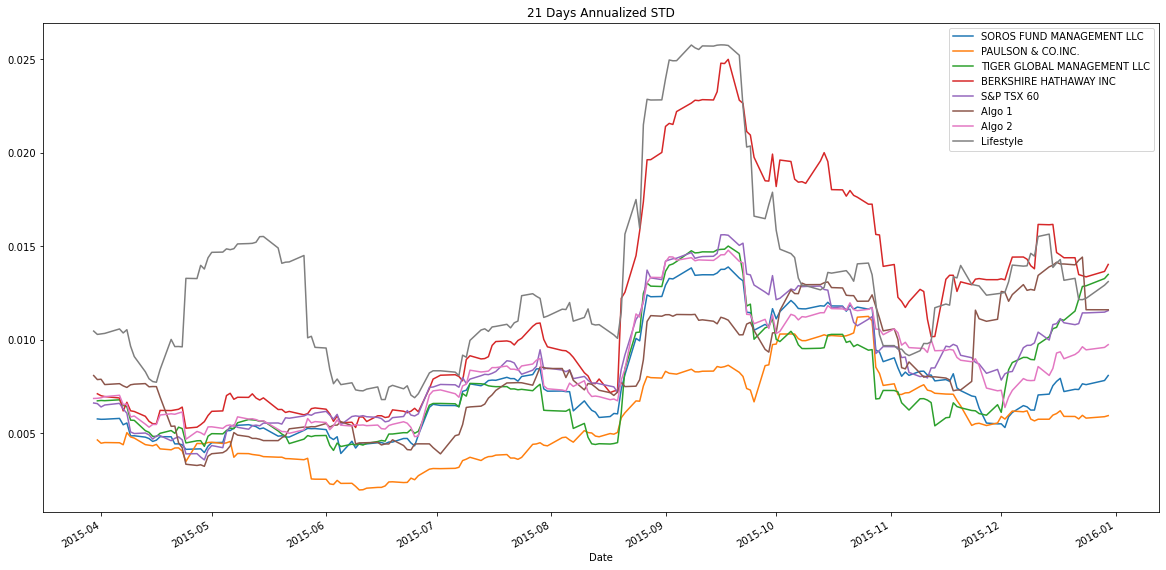

In [185]:
# Calculate rolling standard deviation

comb_stock_port_2_df.rolling(window=21).std()
# Plot rolling standard deviation
comb_stock_port_2_df.rolling(window=21).std().plot(title= "21 Days Annualized STD", figsize=(20,10))



### Calculate and plot the correlation

In [188]:
# Calculate and plot the correlation

comb_stock_port_2_df_correlation=comb_stock_port_2_df.corr()
comb_stock_port_2_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX 60,Algo 1,Algo 2,Lifestyle
SOROS FUND MANAGEMENT LLC,1.000000,0.811018,0.842414,0.776954,0.786417,0.442284,0.872760,0.678127
PAULSON & CO.INC.,0.811018,1.000000,0.729439,0.671815,0.594209,0.373060,0.716057,0.589141
TIGER GLOBAL MANAGEMENT LLC,0.842414,0.729439,1.000000,0.704181,0.721573,0.319953,0.816560,0.759724
BERKSHIRE HATHAWAY INC,0.776954,0.671815,0.704181,1.000000,0.660112,0.364992,0.711734,0.646337
S&P TSX 60,0.786417,0.594209,0.721573,0.660112,1.000000,0.419979,0.780882,0.577143
Algo 1,0.442284,0.373060,0.319953,0.364992,0.419979,1.000000,0.351743,0.266548
Algo 2,0.872760,0.716057,0.816560,0.711734,0.780882,0.351743,1.000000,0.663648
Lifestyle,0.678127,0.589141,0.759724,0.646337,0.577143,0.266548,0.663648,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

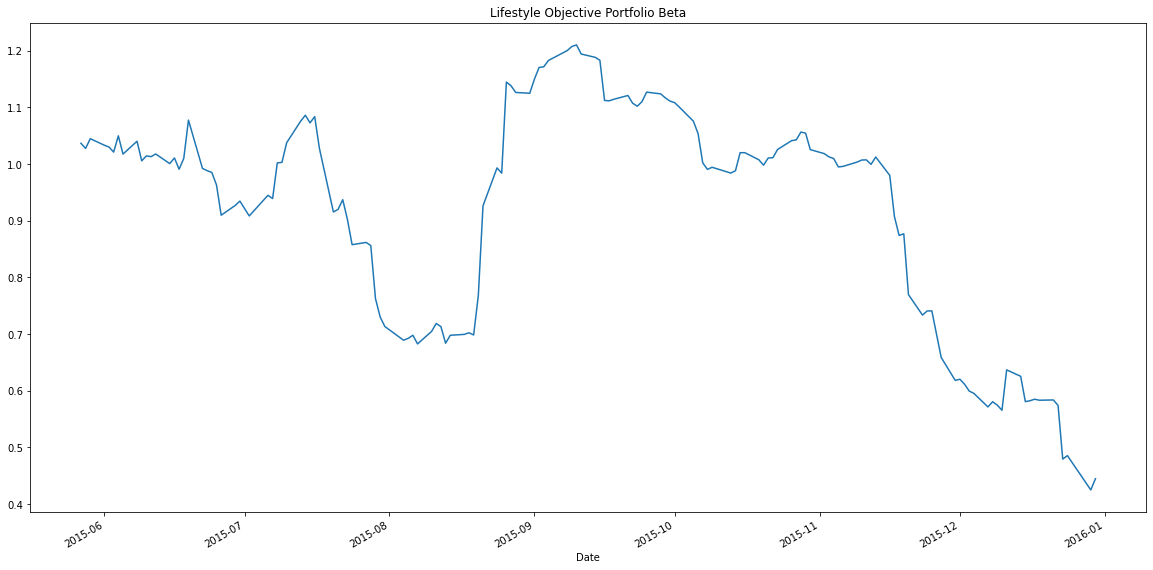

In [191]:
# Calculate and plot Beta

varri_2= comb_stock_port_2_df['S&P TSX 60'].rolling(window=60).var()
varri_2

Lifestyle_Obj_covariance =comb_stock_port_2_df['Lifestyle'].rolling(window=60).cov(comb_stock_port_2_df['S&P TSX 60'])
Lifestyle_Obj_beta = Lifestyle_Obj_covariance / varri_2
Lifestyle_Obj_covariance_beta_plot = Lifestyle_Obj_beta.plot(title='Lifestyle Objective Portfolio Beta', figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [192]:
# Calculate Annualzied Sharpe Ratios

comb_stock_port_2_df_sharpe_ratios = (comb_stock_port_2_df.mean() * 252) / (comb_stock_port_2_df.std() * np.sqrt(252))
comb_stock_port_2_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.809289
Lifestyle                      1.357632
BERKSHIRE HATHAWAY INC         0.380901
TIGER GLOBAL MANAGEMENT LLC    0.358350
SOROS FUND MANAGEMENT LLC      0.175717
PAULSON & CO.INC.             -0.162198
Algo 2                        -0.376961
S&P TSX 60                    -1.196800
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

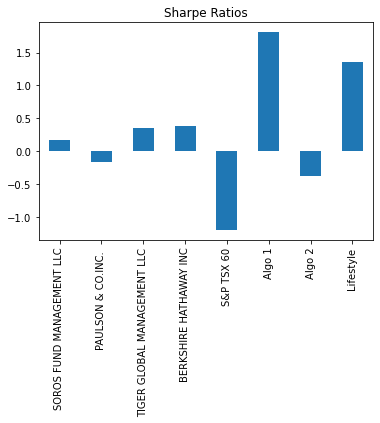

In [194]:
# Visualize the sharpe ratios as a bar plot

comb_stock_port_2_df_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')


### How does your portfolio do?

Write your answer here!

In [ ]:
My Lifestyle portfolio comes very close to the performance of Algo1 at the same time out performing the rest of the market.